# Experiments with Dataset

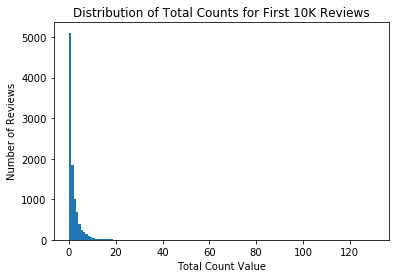

The number of reviews with a total count of 0 is: 5108
The number of reviews with a total count of 1 is: 1851
The number of reviews with a total count of 2 is: 1005
The number of reviews with a total count of 3 is: 694
The number of reviews with a total count of 4 is: 385
The number of reviews with a total count of 5 is: 253
The number of reviews with a total count of 6 is: 184
The number of reviews with a total count of 7 is: 131
The number of reviews with a total count of 8 is: 87
The number of reviews with a total count of 9 is: 57
The number of reviews with a total count of 10 is: 45
The number of reviews with a total count of 11 is: 28
The number of reviews with a total count of 12 is: 26
The number of reviews with a total count of 13 is: 26
The number of reviews with a total count of 14 is: 11
The number of reviews with a total count of 15 is: 20
The number of reviews with a total count of 16 is: 17
The number of reviews with a total count of 17 is: 10
The number of reviews with 

In [1]:
#Referenced https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
#Referenced https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html
#Referenced https://stackoverflow.com/questions/16958430/matplotlib-histograms-and-labels

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

totalCounts = []
for i in range(51):
    data = pd.read_json("ReviewData/yelp_academic_dataset_review" + str(i+1) + ".json") #Read the appropriate file
    #So we can find the distribution of each count
    usefulCounts = data["useful"]
    funnyCounts = data["funny"]
    coolCounts = data["cool"]
    #Get a total of all the counts:
    for i in range(len(usefulCounts)):
        totalCounts.append(usefulCounts[i] + funnyCounts[i] + coolCounts[i])

plt.hist(totalCounts, bins=sorted(list(set(totalCounts))))
plt.title("Distribution of Total Counts for First 10K Reviews")
plt.xlabel("Total Count Value")
plt.ylabel("Number of Reviews")
plt.show()

allCounts = list(set(totalCounts))
reviewsWithEachCount = dict()
for i in allCounts:
    reviewsWithEachCount[i] = 0

for i in allCounts:
    for j in totalCounts:
        if (j == i):
            reviewsWithEachCount[i] = reviewsWithEachCount[i] + 1

for i in reviewsWithEachCount.keys():
    print("The number of reviews with a total count of " + str(i) + " is: " + str(reviewsWithEachCount[i]))

In [11]:
businessData = pd.read_json("YelpData/yelp_academic_dataset_business.json", lines=True)
print(sorted(set(businessData["review_count"])))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223

In [ ]:
print(sorted(set(businessData["review_count"])))

In [3]:
#Referenced https://pandas.pydata.org/pandas-docs/stable/indexing.html
#Referenced https://stackoverflow.com/questions/14639496/python-numpy-array-of-arbitrary-length-strings
#Referenced https://docs.python.org/3/tutorial/datastructures.html
#Referenced http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame

%matplotlib inline

data = pd.read_json("ReviewData/yelp_academic_dataset_review1.json") #Read the appropriate file

#Create a list of useful columns
columns = list(data.columns)
columns.remove("business_id")
columns.remove("user_id")
columns.remove("review_id")
columns.remove("stars")
columns.remove("date")

trainData = np.ndarray(shape=(10000,len(columns)+2), dtype=object) #Include all given data, plus our classes
offset = 0 #This is used to make sure we don't overwrite arrays
threshold = 15 #Given review r with total count k, if k <= threshold, r is not influential

for i in range(51):
    data = pd.read_json("ReviewData/yelp_academic_dataset_review" + str(i+1) + ".json") #Read the appropriate file)
    #So we can find the distribution of each count
    usefulCounts = data["useful"]
    funnyCounts = data["funny"]
    coolCounts = data["cool"]
    #Now we create training data:
    for j in range(len(usefulCounts)):
        #First get the total count (which we want):
        total = usefulCounts[j] + funnyCounts[j] + coolCounts[j]
        for k in range(len(columns)): #Copy all existing data
            trainData[j+offset,k] = data.loc[j,columns[k]]
            
        trainData[j+offset,len(columns)] = total #Now record the total count
        
        #Classify by total count:
        if (total <= threshold): #If in the class of less influential reviews
            trainData[j+offset,len(columns)+1] = False
        else:
            trainData[j+offset,len(columns)+1] = True
            
    #Update offset so as to not overwrite data:
    offset = offset + len(usefulCounts)

#Now prepare the final dataframe by first prepping the columns
listOfFinalCols = columns.copy()
listOfFinalCols.append("Total")
listOfFinalCols.append("Influential")

trainData = pd.DataFrame(data=trainData, columns=listOfFinalCols, dtype=object)
#Now we've got training data for what we want to do!

print(trainData)

     cool funny                                               text useful  \
0       0     0  The pizza was okay. Not the best I've had. I p...      0   
1       0     0  I love this place! My fiance And I go here atl...      0   
2       1     1  Terrible. Dry corn bread. Rib tips were all fa...      3   
3       0     0  Back in 2005-2007 this place was my FAVORITE t...      2   
4       0     0  Delicious healthy food. The steak is amazing. ...      0   
5       0     0  This place sucks. The customer service is horr...      2   
6       0     0  If you like Thai food, you have to try the ori...      1   
7       0     1  AMAZING!!!\n\n I was referred here by a friend...      0   
8       0     0  Ribs = amazing\n2 hour wait time= not so amazi...      0   
9       1     2  Food is pretty good, not gonna lie. BUT you ha...      1   
10      0     0  I have been an Emerald Club member for a numbe...      0   
11      0     0  The score should be negative. Its HORRIBLE. Th...      0   

### Bag of Words Experiments

In [4]:
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
%matplotlib inline
import sklearn.feature_extraction.text as txt
import copy

#In a bag of words, it makes sense to remove stopwords (as those are too common) and remove punctuation, as we are
#looking mainly for the words, not random punctuation signs.
#We remove these things from the text as well.

text = trainData["text"]

for word in text[i].split(): #Every temp[i] is a sentence
    for char in word:
        if char in [".", "?", ","]:
            text[i] = text[i].replace(char, "")
                    
wordsVect = txt.CountVectorizer(stop_words="english")
bagOfWordsTrain = wordsVect.fit_transform(text)

### Naive Bayes for First 5k Reviews Using Bag of Words

In [14]:
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

#Binarize the labels to more clearly define True positives and True negatives
binarizer = LabelBinarizer(neg_label=False, pos_label=True)
binarizer.fit(list(trainData["Influential"]))
newTargets = np.ndarray.flatten(binarizer.transform(list(trainData["Influential"])))

#Do a single fit on first 5k reviews
naiveBayes = GaussianNB()
naiveBayes.fit(bagOfWordsTrain.toarray(), newTargets)
pred = naiveBayes.predict(bagOfWordsTrain.toarray()[:5000])
trueNeg, falsePos, falseNeg, truePos = confusion_matrix(newTargets[:5000], pred).ravel()
print("So the accuracy on the first 5k reviews is: " + str(float(truePos+trueNeg)/(trueNeg+falsePos+falseNeg+truePos)))
print("So the precision on the first 5k reviews is: " + str(float(truePos)/(falsePos+truePos)))
print("So the recall on the first 5k reviews is: " + str(float(truePos)/(falseNeg+truePos)))

#Get some feedback
# print ("Using 5-fold cross validation, we get the following accuracy scores: ")
# print (cross_val_score(estimator=naiveBayes, X=bagOfWordsTrain.toarray()[5000:], y=newTargets[5000:], cv=5))

# print ("Using 5-fold cross validation, we get the following precision scores: ")
# print (cross_val_score(estimator=naiveBayes, X=bagOfWordsTrain.toarray()[5000:], y=newTargets[5000:], cv=5, scoring="precision"))

# print ("Using 5-fold cross validation, we get the following recall scores: ")
# print (cross_val_score(estimator=naiveBayes, X=bagOfWordsTrain.toarray()[5000:], y=newTargets[5000:], cv=5, scoring="recall"))

So the accuracy on the first 5k reviews is: 0.9766
So the precision on the first 5k reviews is: 0.311764705882
So the recall on the first 5k reviews is: 1.0


### Naive Bayes Using Last 5k Reviews Using Bag of Words

In [15]:
pred = naiveBayes.predict(bagOfWordsTrain.toarray()[5000:])
trueNeg, falsePos, falseNeg, truePos = confusion_matrix(newTargets[5000:], pred).ravel()
print("So the accuracy on the second 5k reviews is: " + str(float(truePos+trueNeg)/(trueNeg+falsePos+falseNeg+truePos)))
print("So the precision on the second 5k reviews is: " + str(float(truePos)/(falsePos+truePos)))
print("So the recall on the second 5k reviews is: " + str(float(truePos)/(falseNeg+truePos)))

So the accuracy on the second 5k reviews is: 0.973
So the precision on the second 5k reviews is: 0.210526315789
So the recall on the second 5k reviews is: 1.0


### Random Forest for First 5k Reviews Using Bag of Words

In [16]:
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

#Binarize the labels to more clearly define True positives and True negatives
binarizer = LabelBinarizer(neg_label=False, pos_label=True)
binarizer.fit(list(trainData["Influential"]))
newTargets = np.ndarray.flatten(binarizer.transform(list(trainData["Influential"])))

#Do a single fit on first 5k reviews
forest = RandomForestClassifier()
forest.fit(bagOfWordsTrain.toarray(), newTargets)
pred = forest.predict(bagOfWordsTrain.toarray()[:5000])
trueNeg, falsePos, falseNeg, truePos = confusion_matrix(newTargets[:5000], pred).ravel()
print("So the accuracy on the first 5k reviews is: " + str(float(truePos+trueNeg)/(trueNeg+falsePos+falseNeg+truePos)))
print("So the precision on the first 5k reviews is: " + str(float(truePos)/(falsePos+truePos)))
print("So the recall on the first 5k reviews is: " + str(float(truePos)/(falseNeg+truePos)))

So the accuracy on the first 5k reviews is: 0.998
So the precision on the first 5k reviews is: 1.0
So the recall on the first 5k reviews is: 0.811320754717


### Random Forest for Last 5k Reviews Using Bag of Words

In [17]:
pred = forest.predict(bagOfWordsTrain.toarray()[5000:])
trueNeg, falsePos, falseNeg, truePos = confusion_matrix(newTargets[5000:], pred).ravel()
print("So the accuracy on the second 5k reviews is: " + str(float(truePos+trueNeg)/(trueNeg+falsePos+falseNeg+truePos)))
print("So the precision on the second 5k reviews is: " + str(float(truePos)/(falsePos+truePos)))
print("So the recall on the second 5k reviews is: " + str(float(truePos)/(falseNeg+truePos)))

So the accuracy on the second 5k reviews is: 0.9976
So the precision on the second 5k reviews is: 1.0
So the recall on the second 5k reviews is: 0.666666666667


### Logistic Regression for First 5k Reviews Using Bag of Words

In [18]:
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

#Binarize the labels to more clearly define True positives and True negatives
binarizer = LabelBinarizer(neg_label=False, pos_label=True)
binarizer.fit(list(trainData["Influential"]))
newTargets = np.ndarray.flatten(binarizer.transform(list(trainData["Influential"])))

#Do a single fit on first 5k reviews
regr = LogisticRegression()
regr.fit(bagOfWordsTrain.toarray(), newTargets)
pred = regr.predict(bagOfWordsTrain.toarray()[:5000])
trueNeg, falsePos, falseNeg, truePos = confusion_matrix(newTargets[:5000], pred).ravel()
print("So the accuracy on the first 5k reviews is: " + str(float(truePos+trueNeg)/(trueNeg+falsePos+falseNeg+truePos)))
print("So the precision on the first 5k reviews is: " + str(float(truePos)/(falsePos+truePos)))
print("So the recall on the first 5k reviews is: " + str(float(truePos)/(falseNeg+truePos)))

So the accuracy on the first 5k reviews is: 0.999
So the precision on the first 5k reviews is: 1.0
So the recall on the first 5k reviews is: 0.905660377358


### Logistic Regression for Last 5k Reviews Using Bag of Words

In [19]:
pred = regr.predict(bagOfWordsTrain.toarray()[5000:])
trueNeg, falsePos, falseNeg, truePos = confusion_matrix(newTargets[5000:], pred).ravel()
print("So the accuracy on the second 5k reviews is: " + str(float(truePos+trueNeg)/(trueNeg+falsePos+falseNeg+truePos)))
print("So the precision on the second 5k reviews is: " + str(float(truePos)/(falsePos+truePos)))
print("So the recall on the second 5k reviews is: " + str(float(truePos)/(falseNeg+truePos)))

So the accuracy on the second 5k reviews is: 0.999
So the precision on the second 5k reviews is: 1.0
So the recall on the second 5k reviews is: 0.861111111111


### SVM for First 5k Reviews Using Bag of Words

In [21]:
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#Referenced http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

#Binarize the labels to more clearly define True positives and True negatives
binarizer = LabelBinarizer(neg_label=False, pos_label=True)
binarizer.fit(list(trainData["Influential"]))
newTargets = np.ndarray.flatten(binarizer.transform(list(trainData["Influential"])))

#Do a single fit on first 5k reviews
suppVecMach = SVC(kernel="linear") #Since linear decision boundaries have clearly worked well so far
suppVecMach.fit(bagOfWordsTrain.toarray(), newTargets)
pred = suppVecMach.predict(bagOfWordsTrain.toarray()[:5000])
trueNeg, falsePos, falseNeg, truePos = confusion_matrix(newTargets[:5000], pred).ravel()
print("So the accuracy on the first 5k reviews is: " + str(float(truePos+trueNeg)/(trueNeg+falsePos+falseNeg+truePos)))
print("So the precision on the first 5k reviews is: " + str(float(truePos)/(falsePos+truePos)))
print("So the recall on the first 5k reviews is: " + str(float(truePos)/(falseNeg+truePos)))

So the accuracy on the first 5k reviews is: 1.0
So the precision on the first 5k reviews is: 1.0
So the recall on the first 5k reviews is: 1.0


### SVM For Last 5k Reviews Using Bag of Words

In [22]:
pred = suppVecMach.predict(bagOfWordsTrain.toarray()[5000:])
trueNeg, falsePos, falseNeg, truePos = confusion_matrix(newTargets[5000:], pred).ravel()
print("So the accuracy on the second 5k reviews is: " + str(float(truePos+trueNeg)/(trueNeg+falsePos+falseNeg+truePos)))
print("So the precision on the second 5k reviews is: " + str(float(truePos)/(falsePos+truePos)))
print("So the recall on the second 5k reviews is: " + str(float(truePos)/(falseNeg+truePos)))

So the accuracy on the first 5k reviews is: 1.0
So the precision on the first 5k reviews is: 1.0
So the recall on the first 5k reviews is: 1.0
